# 13.2 Regression Splines

To fit regression splines, we continue with the same data as in the previous section. Again, we want to predict `wage` from `age` in the Mid-Atlantic Wage Dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from ISLP import load_data

# Load the data
df = load_data('Wage')

## Fitting piecewise linear splines

Similar to fitting a stepwise function, we first need to create the design matrix for our transformed predictor `age`. This time we specify two knots (at age 40 and 60), and first-order polynomial:

In [2]:
transformed_age = patsy.dmatrix("bs(age, knots=(40,60), degree=1)",
                                data={"age": df['age']},
                                return_type='dataframe')

We then create and fit the model:

In [3]:
# Fit the model
model = sm.OLS(df['wage'], transformed_age)
model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     90.93
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           2.59e-56
Time:                        08:53:32   Log-Likelihood:                -15319.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


The `coeff` column indicates the coefficients of `wage` regressing on each basis function of `age`, i.e. $b_0, b_1, b_2, b_3$. 

However, spline regression coefficients are not analogous to slope coefficients in simple linear regression and they are not directly interpretable as increase or decrease on $Y$ given one-unit increase on $X$! Spline regression coefficients scale the computed basis functions for a given value of $X$ (see slides from the multivariate statistics lecture).

We can nevertheless calculate the slopes of the fitted spline starting from our coefficients:

$$
\text{slope}_1 = \frac{\text{coef}[1]}{\text{knot}[0] - \text{knot.boundary.left}} = \frac{\text{49.81}}{\text{40 - 18}} = 2.26
$$

$$
\text{slope}_2 = \frac{\text{coef}[2] - \text{coef}[1]}{\text{knot}[1] - \text{knot}[0]} = \frac{\text{45.71 - 49.81}}{\text{60 - 40}} = -0.2
$$

$$
\text{slope}_3 = \frac{\text{coef}[3] - \text{coef}[2]}{\text{knot.boundary.right} - \text{knot}[1]} = \frac{\text{17.21 - 45.71}}{\text{80 - 60}} = -1.42
$$


## Plotting the model

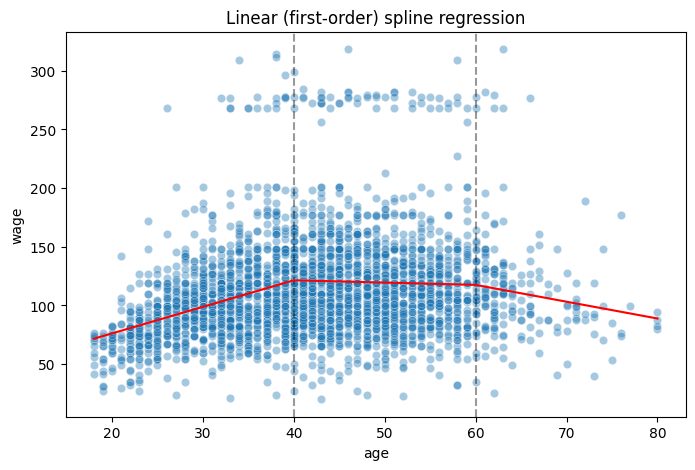

In [4]:
# Create evenly spaced values to plot the model predictions
xp = np.linspace(df['age'].min(), df['age'].max(), 100)
xp_trans = patsy.dmatrix("bs(xp, knots=(40,60), degree=1)",
                         data={"xp": xp},
                         return_type='dataframe')

# Use model fitted before to predict wages for generated age values
predictions = model_fit.predict(xp_trans)

# Plot the original data and the model fit
fig, ax = plt.subplots(figsize=(8,5))                           # Create figure object

sns.scatterplot(data=df, x="age", y="wage", alpha=0.4, ax=ax)   # Plot observations
ax.axvline(40, linestyle='--', alpha=0.4, color="black")        # Cut point 1
ax.axvline(60, linestyle='--', alpha=0.4, color="black")        # Cut point 2
ax.plot(xp, predictions, color='red')                           # Draw prediction
ax.set_title("Linear (first-order) spline regression");

The model plot shows that we have gone from fitting an intercept (i.e., a horizontal line) in each bin to fitting a linear function in each bin.